In [1]:
import matplotlib
matplotlib.use('nbagg')
import numpy as np
import matplotlib.pyplot as plt

# mpl_toolkits

In addition to the core library of Matplotlib, there are a few additional utilities that are set apart from Matplotlib proper for some reason or another, but are often shipped with Matplotlib.

* [Basemap](http://matplotlib.org/basemap/) - shipped separately from matplotlib due to size of mapping data that are included.
* [mplot3d](http://matplotlib.org/mpl_toolkits/mplot3d/index.html#toolkit-mplot3d-index) - shipped with matplotlib to provide very simple, rudimentary 3D plots in the same style as matplotlib's 2D plots.
* [axes_grid1](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html) - An enhanced SubplotAxes. Very Enhanced...

# mplot3d
By taking advantage of Matplotlib's z-order layering engine, mplot3d emulates 3D plotting by projecting 3D data into 2D space, layer by layer. While it isn't going to replace any of the true 3D plotting libraries anytime soon, its goal is to allow for Matplotlib users to produce 3D plots with the same amount of simplicity as 2D plots.

<IPython.core.display.Javascript object>


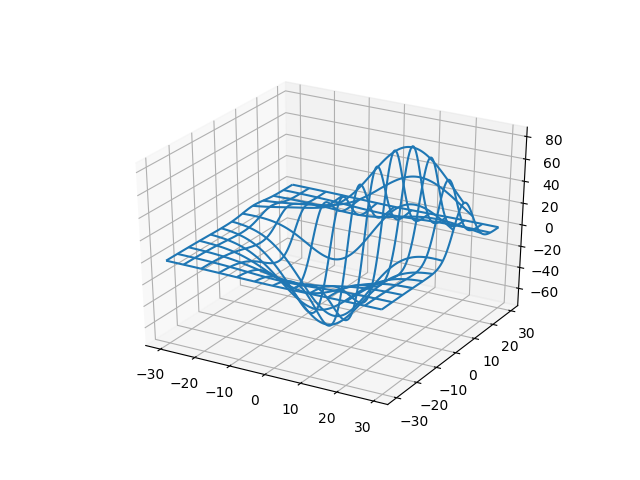

In [2]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

# axes_grid1
This module was originally intended as a collection of helper classes to ease the displaying of (possibly multiple) images with Matplotlib. Some of the functionality has come to be useful for non-image plotting as well. Some classes deals with the sizing and positioning of multiple Axes relative to each other ([`ImageGrid`](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html#imagegrid), [`RGB Axes`](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html#rgb-axes), and [`AxesDivider`](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html#axesdivider)). The [`ParasiteAxes`](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html#parasiteaxes) allow for the plotting of multiple datasets in the same axes, but with each their own x or y scale. Also, there is the [`AnchoredArtist`](http://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html#anchoredartists) that can be used to anchor particular artist objects in place.

One can get a sense of the neat things that can be done with this toolkit by browsing through its user guide linked above. There is one particular feature that is an absolute must-have for me -- automatic allocation of space for colorbars.

<IPython.core.display.Javascript object>


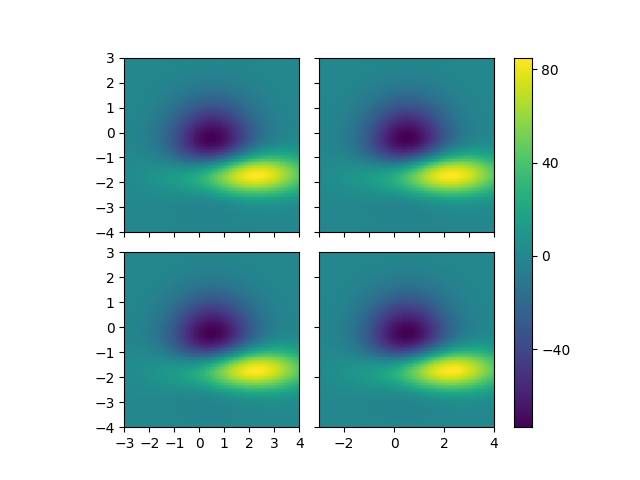

In [3]:
from mpl_toolkits.axes_grid1 import AxesGrid
fig = plt.figure()
grid = AxesGrid(fig, 111, # similar to subplot(111)
                nrows_ncols = (2, 2),
                axes_pad = 0.2,
                share_all=True,
                label_mode = "L",  # similar to "label_outer"
                cbar_location = "right",
                cbar_mode="single",
               )

extent = (-3,4,-4,3)
for i in range(4):
    im = grid[i].imshow(Z, extent=extent, interpolation="nearest")
    
grid.cbar_axes[0].colorbar(im)
plt.show()

This next feature is commonly requested on the mailing lists.  The problem is that most people who request it don't quite know how to describe it.  We call it "Parasite Axes".

<IPython.core.display.Javascript object>


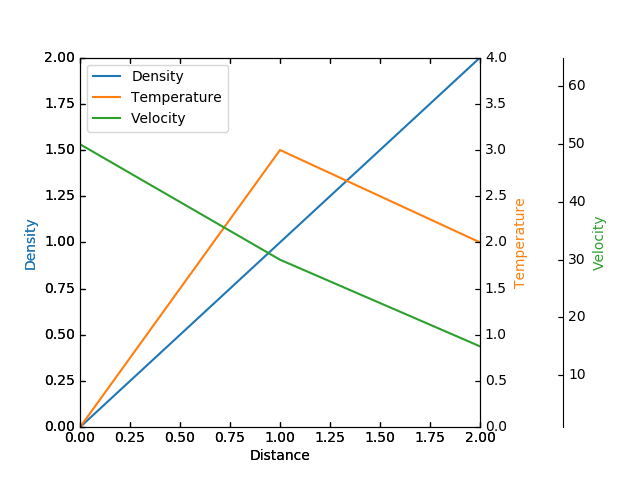

In [4]:
# %load http://matplotlib.org/mpl_examples/axes_grid/demo_parasite_axes2.py
"""
Parasite axis demo

The following code is an example of a parasite axis. It aims to show a user how
to plot multiple different values onto one single plot. Notice how in this
example, par1 and par2 are both calling twinx meaning both are tied directly to
the x-axis. From there, each of those two axis can behave separately from the
each other, meaning they can take on separate values from themselves as well as
the x-axis.
"""
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlim(0, 2)
host.set_ylim(0, 2)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.show()


And finally, as a nice teaser of what else axes_grid1 can do...

<IPython.core.display.Javascript object>


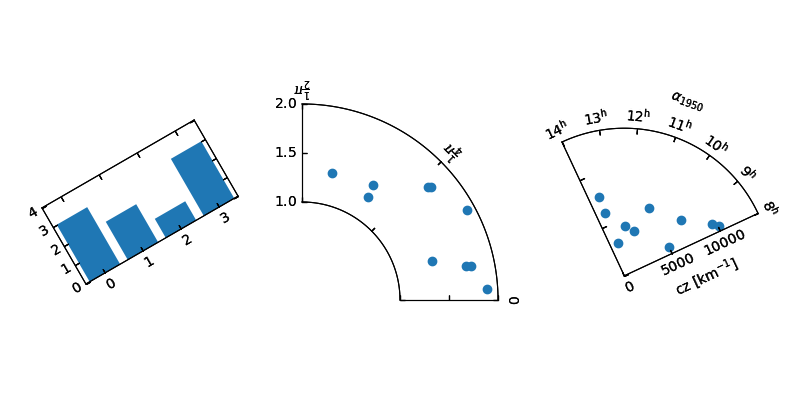

In [5]:
# %load http://matplotlib.org/mpl_toolkits/axes_grid/examples/demo_floating_axes.py
"""
Demo of the floating axes.

This demo shows features of functions in floating_axes:
    * Using scatter function and bar function with changing the
      shape of the plot.
    * Using GridHelperCurveLinear to rotate the plot and set the
      boundary of the plot.
    * Using FloatingSubplot to create a subplot using the return
      value from GridHelperCurveLinear.
    * Making sector plot by adding more features to GridHelperCurveLinear.
"""
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
import matplotlib.pyplot as plt


def setup_axes1(fig, rect):
    """
    A simple one.
    """
    tr = Affine2D().scale(2, 1).rotate_deg(30)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(-0.5, 3.5, 0, 4))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    aux_ax = ax1.get_aux_axes(tr)

    grid_helper.grid_finder.grid_locator1._nbins = 4
    grid_helper.grid_finder.grid_locator2._nbins = 4

    return ax1, aux_ax


def setup_axes2(fig, rect):
    """
    With custom locator and formatter.
    Note that the extreme values are swapped.
    """
    tr = PolarAxes.PolarTransform()

    pi = np.pi
    angle_ticks = [(0, r"$0$"),
                   (.25*pi, r"$\frac{1}{4}\pi$"),
                   (.5*pi, r"$\frac{1}{2}\pi$")]
    grid_locator1 = FixedLocator([v for v, s in angle_ticks])
    tick_formatter1 = DictFormatter(dict(angle_ticks))

    grid_locator2 = MaxNLocator(2)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(.5*pi, 0, 2, 1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax


def setup_axes3(fig, rect):
    """
    Sometimes, things like axis_direction need to be adjusted.
    """

    # rotate a bit for better orientation
    tr_rotate = Affine2D().translate(-95, 0)

    # scale degree to radians
    tr_scale = Affine2D().scale(np.pi/180., 1.)

    tr = tr_rotate + tr_scale + PolarAxes.PolarTransform()

    grid_locator1 = angle_helper.LocatorHMS(4)
    tick_formatter1 = angle_helper.FormatterHMS()

    grid_locator2 = MaxNLocator(3)

    ra0, ra1 = 8.*15, 14.*15
    cz0, cz1 = 0, 14000
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, cz0, cz1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # adjust axis
    ax1.axis["left"].set_axis_direction("bottom")
    ax1.axis["right"].set_axis_direction("top")

    ax1.axis["bottom"].set_visible(False)
    ax1.axis["top"].set_axis_direction("bottom")
    ax1.axis["top"].toggle(ticklabels=True, label=True)
    ax1.axis["top"].major_ticklabels.set_axis_direction("top")
    ax1.axis["top"].label.set_axis_direction("top")

    ax1.axis["left"].label.set_text(r"cz [km$^{-1}$]")
    ax1.axis["top"].label.set_text(r"$\alpha_{1950}$")

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax


##########################################################
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

ax1, aux_ax1 = setup_axes1(fig, 131)
aux_ax1.bar([0, 1, 2, 3], [3, 2, 1, 3])

ax2, aux_ax2 = setup_axes2(fig, 132)
theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax2.scatter(theta, radius)

ax3, aux_ax3 = setup_axes3(fig, 133)

theta = (8 + np.random.rand(10)*(14 - 8))*15.  # in degrees
radius = np.random.rand(10)*14000.
aux_ax3.scatter(theta, radius)

plt.show()
